In [93]:
#Gerekli kütüphanlerin import edilme işlemi
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [94]:
data=pd.read_csv("Titanic.csv")#Data'nın Hazırlanma işlemi
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
#Modeli kötü etkileyecek sütünları sildim
data.drop("PassengerId",axis=1,inplace=True)
data.drop("Name",axis=1,inplace=True)
data.drop("Ticket",axis=1,inplace=True)
data.drop("Cabin",axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
data.dropna(axis=0,inplace=True)#Data'daki boş verileri sildim/axis=0->satır
print(data.isnull().sum())#Data'da boş veri olup olmadığını kontrol ettim

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [97]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])#LabelEncoder işlemi


Embarked_dummies=pd.get_dummies(data["Embarked"])
data=pd.concat([data,Embarked_dummies],axis=1)
data.drop("Embarked",axis=1,inplace=True)
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [98]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

<AxesSubplot:>

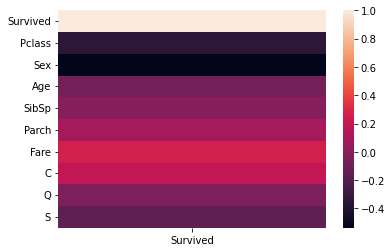

In [99]:
sbn.heatmap(data.corr()[["Survived"]])#Veriler arasındaki ilişkileri tablo haline getiriyor

In [100]:
x=data.drop("Survived",axis=1).values#Bağımsız değişken
y=data["Survived"].values#Bağımlı değişken

In [101]:
#Data'da hakkında önemli bilgilerin incelenmesi
import statsmodels.api as sm
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     58.84
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.73e-73
Time:                        18:55:44   Log-Likelihood:                -321.06
No. Observations:                 712   AIC:                             660.1
Df Residuals:                     703   BIC:                             701.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1874      0.023     -8.183      0.000      -0.232      -0.142
x2            -0.4854      0.032    -15.389      0.000      -0.547      -0.423
x3            -0.0064      0.001     -5.661      0.000      -0.009      -0.004
x4            -0.0508      0.017     -2.912      0.004      -0.085      -0.017
x5            -0.0107      0.019     -0.561      0.575      -0.048       0.027
x6             0.0002      0.000      0.565      0.572      -0.000       0.001
x7             1.4031      0.082     17.214      0.000       1.243       1.563
x8             1.3043      0.111     11.709      0.000       1.086       1.523
x9             1.3367      0.079     16.815      0.000       1.181       1.493
==============================================================================
Omnibus:                       25.698   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.819
Skew:                           0.484   Prob(JB):                     9.10e-07
Kurtosis:                       3.019   Cond. No.                         678.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
#Eğitim ve test kümelerinin hazırlanması
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [103]:
#Standarilize edilme işlemi
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

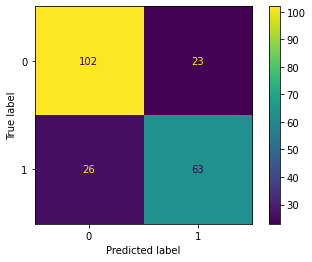

In [104]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion="entropy")
rf.fit(x_train,y_train)#Eğit
y_pred=rf.predict(x_test)#Tahmin et
#Hata ayıklama yöntemi
cm=confusion_matrix(y_test,y_pred)
table=ConfusionMatrixDisplay(cm)
table.plot()
plt.show()

In [105]:
#Boyut indirgeme işlemi
from sklearn.decomposition import PCA
pca=PCA(n_components=3)#Bağımsız değişken olarak en uyumlu 3 sütunu seç
x_train2=pca.fit_transform(x_train)
x_test2=pca.transform(x_test)

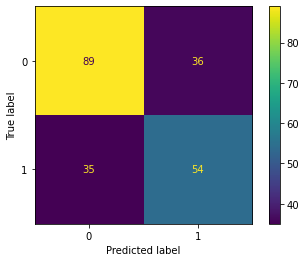

In [106]:
#Random Forest Classifier
rf2=RandomForestClassifier(n_estimators=10,criterion="entropy")
rf2.fit(x_train2,y_train)#Eğit
y_pred=rf2.predict(x_test2)#Tahmin Et
#Hata ayıklama yöntemi
cm=confusion_matrix(y_test,y_pred)
table=ConfusionMatrixDisplay(cm)
table.plot()
plt.show()